Try to implement the functions in fsmc_code.py and complete lines with "###"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import null_space

# Old code for making LaTeX work
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

%matplotlib inline

In [2]:
from fsmc_code import compute_Phi_ET, simulate_hitting_time, stationary_distribution


### Exercise 1

What is the distribution of the number of fair coin tosses before one observes 3 heads in a row? To solve this, consider a 4-state Markov chain with transition probability matrix
$$
    P = 
    \begin{bmatrix}
        0.5 & 0.5 & 0 & 0 \\
        0.5 & 0 & 0.5 & 0 \\
        0.5 & 0 & 0 & 0.5 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$
where $ X_t = 1 $ if the previous toss was tails, $ X_t = 2 $ if the last two tosses were tails then heads, $ X_t = 3 $ if the last three tosses were tails then heads twice, and $ X_t = 4 $ is an absorbing state that is reached when the last three tosses are heads. 

* ** (15 pts) ** Write a computer program (e.g., in Python, Matlab, ...) to compute $ \Pr(T_{1,4} = m) $ for $ m = 1, 2, \ldots, 100 $ and ** (10 pts) ** use this to compute and print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $ 

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_19284\2879837873.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(m, Pr, use_line_collection=True)


Text(0.5, 1.0, 'E[T_{1,4}] = 13.968281182565008')

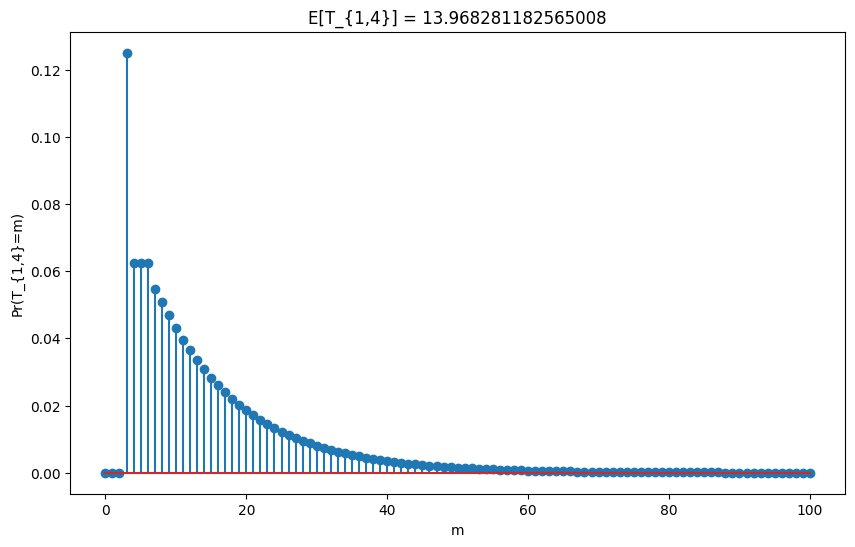

In [3]:
# See compute_Phi_ET in fsmc_code.py
P = np.array([[0.5, 0.5, 0, 0], [0.5, 0, 0.5, 0], [0.5, 0, 0, 0.5], [0, 0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 100)

    
m = [i for i in range(100+1)]
Pr = [0]+[(Phi_list[i]-Phi_list[i-1])[0][3] for i in range(1,len(Phi_list))]
E = ET[0][3]

plt.figure(figsize=(10, 6))
plt.stem(m, Pr, use_line_collection=True)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,4}=m)')
plt.title(r'E[T_{1,4}] = ' + str(E))

* ** (15 pts) ** Write a computer program that generates 500 realizations from this Markov chain and ** (10 pts) ** uses them to plot a histogram of $ T_{1,4} $ and compute/print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $.

Text(0.5, 1.0, 'mean of T_{1,4} = 14.476')

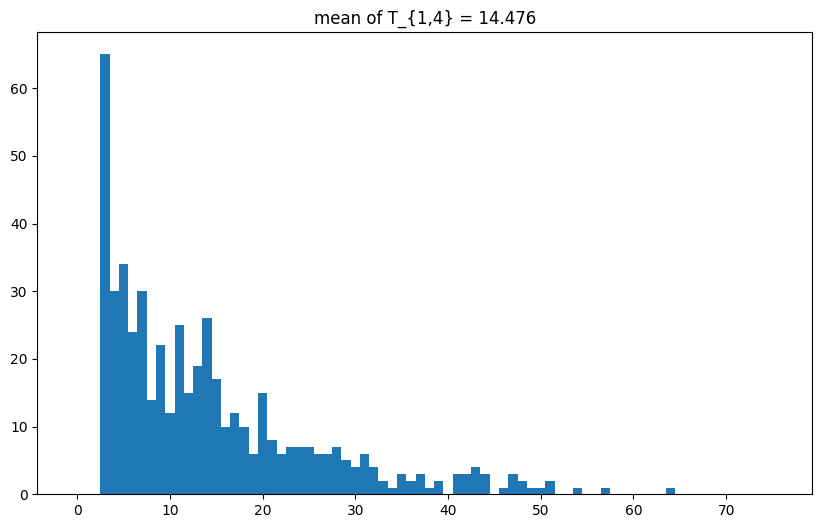

In [4]:
# implement simulate_hitting_time(P, states, nr) in fsmc_code.py
        
T = simulate_hitting_time(P, [0, 3], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,4} = ' + str(np.mean(T)))

### Exercise 2

Consider the miniature chutes and ladders game shown in Figure 1. 
Assume a player starts on the space labeled 1 and plays by rolling a fair four-sided die and then moves that number of spaces. 
If a player lands on the bottom of a ladder, then they automatically climb to the top. 
If a player lands at the top of a slide, then they automatically slide to the bottom. 
This process can be modeled by a Markov chain with $ n = 16 $ states where each state is associated with a square where players can start their turn (e.g., players never start at the bottom of a ladder or the top of a slide). 
To finish the game, players must land exactly on space 20 (moves beyond this are not taken). 

* ** (10 pts) ** Compute the transition probability matrix $ P $ of the implied Markov chain. 

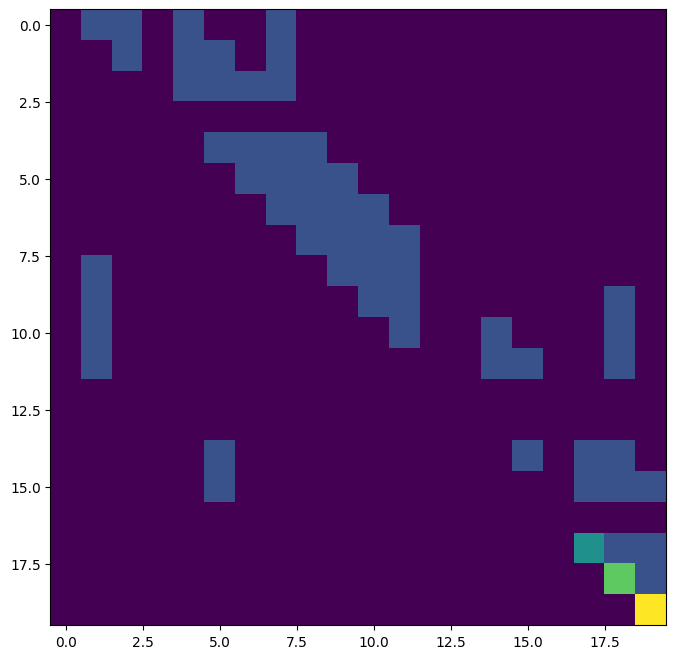

In [54]:
# You can either do this by hand (e.g., look at picture and write down matrix) or by automating the process.

# By hand
# P = np.asarray([[...],[...],[...],...])

###

# Or automated general function for Chutes and Ladders games
def construct_P_matrix(n, dice, chutes, ladders):
    '''
    Arguments:
        n {int} -- size of the state space
        dice {numpy.array} -- probability distribution of the dice outcome
        chutes {list[(int, int)]} -- the list of chutes, in pairs of (start, end)
        ladders {list[(int, int)]} -- the list of ladders, in pairs of (start, end)

    Returns:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
    '''

    # Add code here to build matrix
    chutes_ladder_map = {}
    for (source, dest) in chutes:
        chutes_ladder_map[source] = dest
    for (source, dest) in ladders:
        chutes_ladder_map[source] = dest

    P = np.zeros((n,n))
    for P_idx in range(n):
        startpoint = P_idx+1
        if startpoint in chutes_ladder_map:
            continue
    
        possible_options = []
        for option in range(startpoint+1,startpoint+1+len(dice)):
            if option > n:
                continue
            if option not in chutes_ladder_map:
                possible_options.append(option)
            else:
                possible_options.append(chutes_ladder_map[option])

        total_prob = 0
        for i in range(len(possible_options)):
            option = possible_options[i]
            prob = dice[i]
            idx = option - 1
            P[P_idx][idx] = prob
            total_prob += prob
        P[P_idx][P_idx] = 1-total_prob
    return P
    
n = 20
dice = [0.25,0.25,0.25,0.25]
chutes = [(13,2),(17,6)]
ladders = [(4,8),(14,19)]
P = construct_P_matrix(n, dice, chutes, ladders)
###

# Plot transition matrix
plt.figure(figsize=(8, 8))
plt.imshow(P)

* ** (10 pts) ** For this Markov chain, use function from Exercise 1 to compute and plot the cumulative distribution of the number turns a player takes to finish (i.e., the probability $ \Pr(T_{1, 20} \le m) $ where $ T_{1, 20} $ is the hitting time from state 1 to state 20).
Compute and print the mean $\mathbb{E}[T_{1,20}]$. 

Text(0.5, 1.0, 'E[T_{1,20}] = 12.792328542606766')

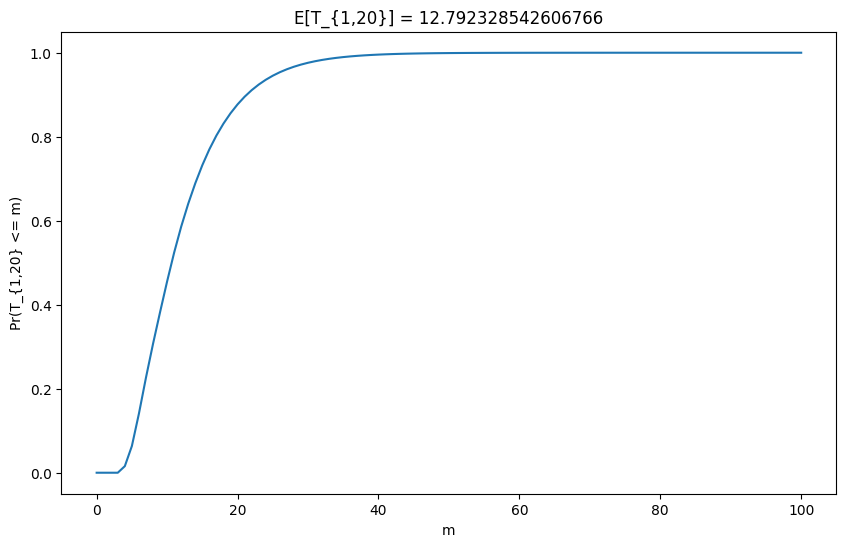

In [6]:
# Use previous functions to complete this exercise
Phi_list, ET = compute_Phi_ET(P, ns=100)

m = [i for i in range(100+1)]
Pr = [0]+[(Phi_list[i])[0][19] for i in range(1,len(Phi_list))]
E = ET[0][19]

plt.figure(figsize=(10, 6))
plt.plot(m ,Pr)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,20} <= m)')
plt.title(r'E[T_{1,20}] = ' + str(E))

* ** (10 pts) ** Use function from Exercise 1 to generate 500 realizations from this Markov chain.  Then, use them to plot a histogram of $ T_{1, 20} $ and compute/print an estimate of the expected number of tosses $\mathbb{E}\left[T_{1,20}\right]$.

Text(0.5, 1.0, 'mean of T_{1,20} =12.904')

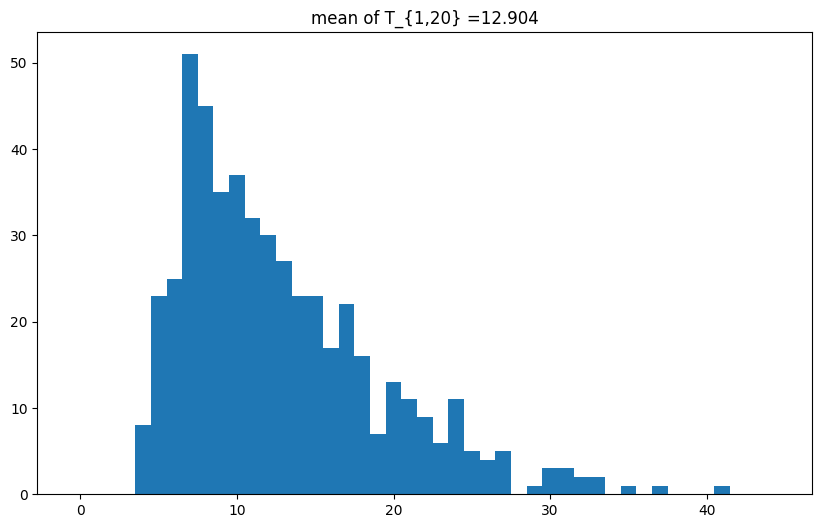

In [7]:
# Use previous funcitons to complete this exercise
T = simulate_hitting_time(P, [0, n-1], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,20} =' + str(np.mean(T)))

* Optional Challenge: If the ﬁrst player rolls 4 and climbs the ladder to square 8, then what is the probability that the second player will win.

In [8]:
# Use previous functions to complete this exercise

### compute Pr_win


### Example 1

In a certain city, it is said that the weather is rainy with a 90% probability if it was rainy the previous day and with a 50% probability if it not rainy the previous day. 
If we assume that only the previous day’s weather matters, then we can model the weather of this city by a Markov chain with $ n = 2 $ states whose transitions are governed by
$$
    P = 
    \begin{bmatrix}
        0.9 & 0.1 \\
        0.5 & 0.5
    \end{bmatrix}
$$
Under this model, what is the steady-state probability of rainy weather?


In [9]:
# implement stationary_distribution(P) in fsmc.py

P = np.array([[0.9, 0.1], [0.5, 0.5]])
stationary_distribution(P)

array([[0.83333333],
       [0.16666667]])

### Exercise 3

** (10 pts) ** Write a program to compute the stationary distribution of a Markov chain when it is unique.
Consider a game where the gameboard has 8 diﬀerent spaces arranged in a circle. 
During each turn, a player rolls two 4-sided dice and moves clockwise by a number of spaces equal to their sum. 
** (5 pts) ** Define the transition matrix for this 8-state Markov chain and compute its stationary distribution.

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


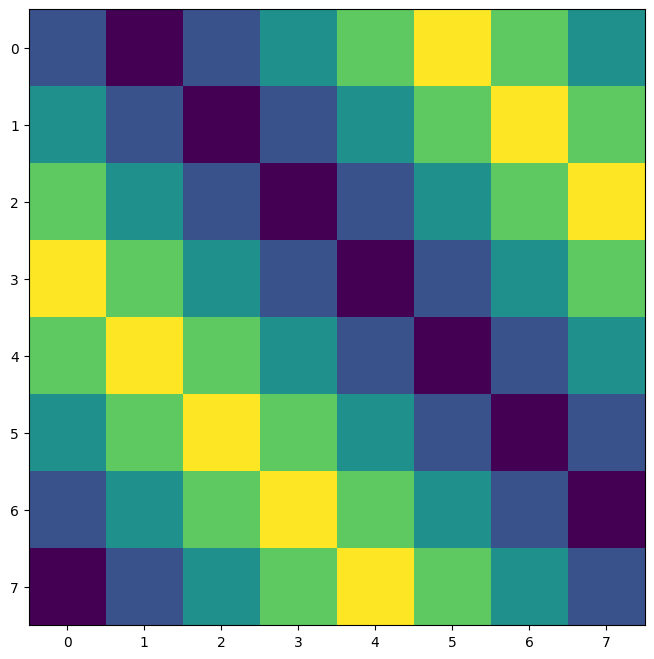

In [48]:
# Use previous functions to complete this exercise
P = np.zeros((8,8))
template = [1/16,0,1/16,2/16,3/16,4/16,3/16,2/16]
for i in range(8):
    temp = []
    for j in range(8):
        P[i][(i+j)%8] = template[j]
print(P)
stationary_distribution(P)
plt.figure(figsize=(8, 8))
im = plt.imshow(P)

Next, suppose that one space is special (e.g., state-1 of the Markov chain) and a player can only leave this space by rolling doubles (i.e., when both dice show the same value). Again, the player moves clockwise by a number of spaces equal to their sum. ** (5 pts) ** Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

[[0.8125 0.     0.0625 0.     0.0625 0.     0.0625 0.    ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


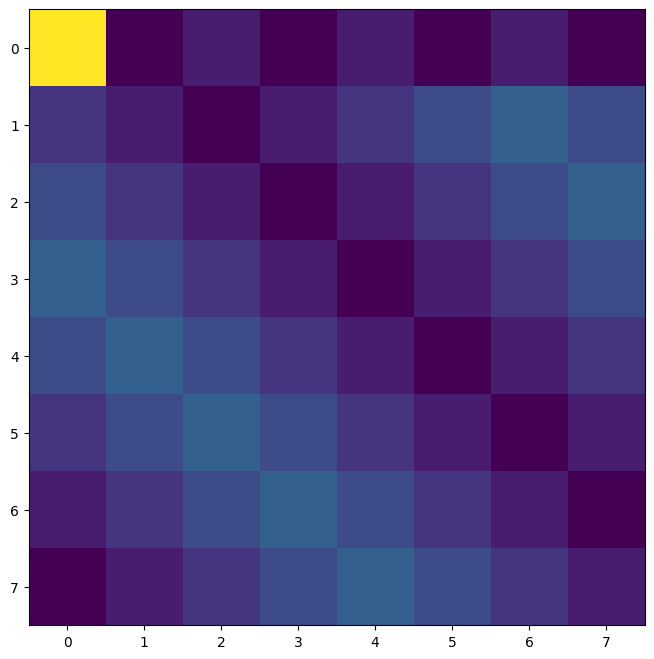

In [49]:
# Use previous functions to complete this exercise
P = np.zeros((8,8))
template = [1/16,0,1/16,2/16,3/16,4/16,3/16,2/16]
for i in range(8):
    temp = []
    for j in range(8):
        P[i][(i+j)%8] = template[j]
for i in range(8):
    P[0][i] = 0
P[0][0] = 13/16
P[0][2] = 1/16
P[0][4] = 1/16
P[0][6] = 1/16

print(P)
stationary_distribution(P)
plt.figure(figsize=(8, 8))
im = plt.imshow(P)